# Cytometry data analysis of rhodamine accumulation assay

## Load packages

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np

## Specify filepaths

In [2]:
source1 = 'data/20210930_LL13_AllFCS.csv'
source2 = 'data/20210930_NC02_AllFCS.csv'
graph_outpath = 'graphs/'

## Get cytometry data

In [3]:
s1df = pd.read_csv(source1, header=0)
s2df = pd.read_csv(source2, header=0)
source_df = pd.concat([s1df,s2df], axis=0)
source_df.head(2)

,well,rearray_plate_nb,RA_well,type,file_fcs,presence,file,no,FSC.HLin,SSC.HLin,...,YEL.B.HLin,RED.B.HLin,NIR.B.HLin,YEL.G.HLin,ORG.G.HLin,RED.G.HLin,NIR.G.HLin,BLU.V.ALin,BLU.V.W,TIME
0,A01,2,NaN,positive_control,1,1,2021-09-30_at_04-56-55pm-1.fcs,1,958.595459,237.857422,...,263.481323,22.362305,4.054282,1134.159424,5808.072266,87.715416,18.250307,1.079596,-3479.793701,25
1,A01,2,NaN,positive_control,1,1,2021-09-30_at_04-56-55pm-1.fcs,1,720.068970,218.440552,...,176.060837,12.457969,2.408577,818.806091,4304.232910,60.038601,15.082832,0.898138,-2285.139404,155


In [4]:
source_df['strain'] = source_df.rearray_plate_nb.apply(lambda x: 'LL13-040' if x==2 else 'NC-02')
source_df.head(2)

,well,rearray_plate_nb,RA_well,type,file_fcs,presence,file,no,FSC.HLin,SSC.HLin,...,RED.B.HLin,NIR.B.HLin,YEL.G.HLin,ORG.G.HLin,RED.G.HLin,NIR.G.HLin,BLU.V.ALin,BLU.V.W,TIME,strain
0,A01,2,NaN,positive_control,1,1,2021-09-30_at_04-56-55pm-1.fcs,1,958.595459,237.857422,...,22.362305,4.054282,1134.159424,5808.072266,87.715416,18.250307,1.079596,-3479.793701,25,LL13-040
1,A01,2,NaN,positive_control,1,1,2021-09-30_at_04-56-55pm-1.fcs,1,720.068970,218.440552,...,12.457969,2.408577,818.806091,4304.232910,60.038601,15.082832,0.898138,-2285.139404,155,LL13-040


## SSC / FSC

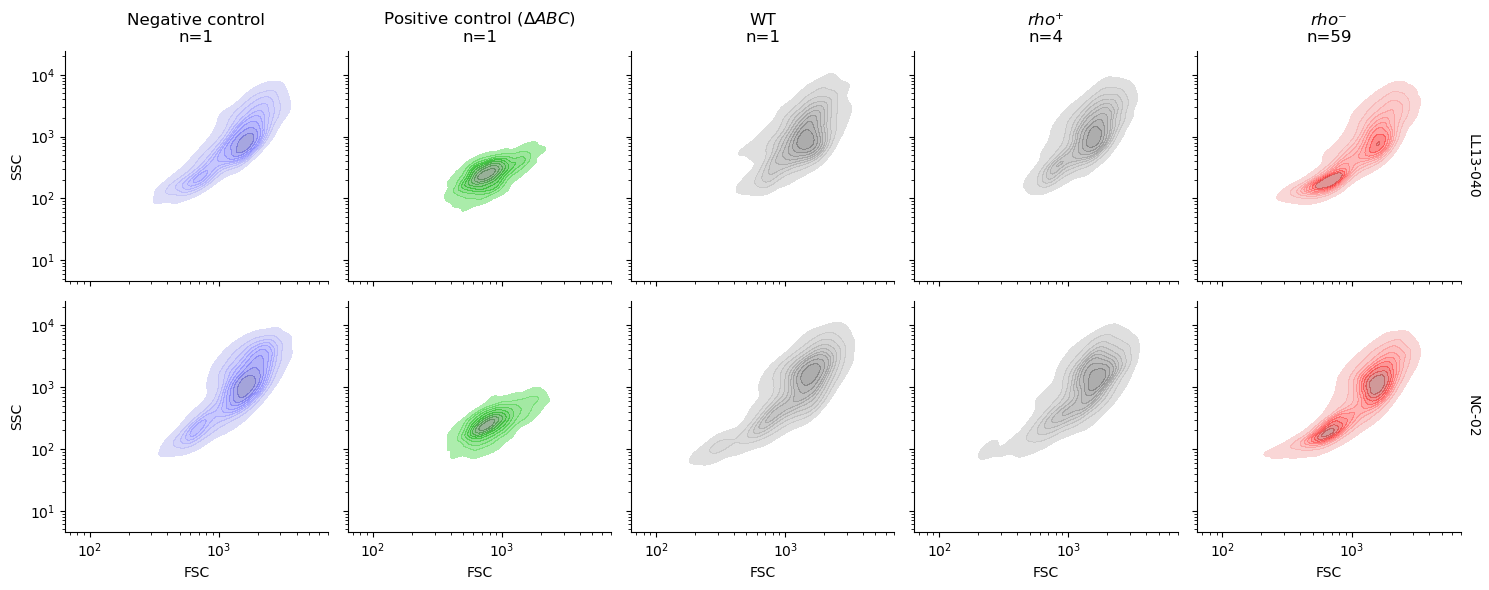

In [5]:
type_order = ['negative_control','positive_control','wt','rho_plus','rho0']
grid = sns.FacetGrid(source_df, row='strain', col='type', col_order = type_order,
                     hue = 'type', hue_order = type_order, palette=['blue', 'green', 'black', 'grey', 'red'],
                     margin_titles=True, legend_out=True)
grid.map(sns.kdeplot, 'FSC.HLin', 'SSC.HLin', log_scale=True, fill=True, alpha=.5)
grid.set_titles(row_template='{row_name}')

type_labels = ['Negative control', u'Positive control (Δ$\it{ABC}$)', 'WT', '$\it{rho}$⁺', '$\it{rho}$⁻']
for i, v in enumerate(type_order):
    grid.axes[0][i].set_title(type_labels[i]+
                              '\nn='+str(len(source_df[source_df.type==v].well.unique()))
                             ) # Note: not the same font size as classic set_titles

grid.set_axis_labels('FSC', 'SSC')
plt.tight_layout()

## Normalization

In [5]:
source_df['NormGrnB']=source_df['GRN.B.HLin']/source_df['FSC.HLin']
source_df['NormOrgG']=source_df['ORG.G.HLin']/source_df['FSC.HLin']

C:\Users\duran\AppData\Roaming\jupyterlab-desktop\jlab_server\lib\site-packages\pandas\core\arraylike.py:402: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\duran\AppData\Roaming\jupyterlab-desktop\jlab_server\lib\site-packages\pandas\core\arraylike.py:402: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\duran\AppData\Roaming\jupyterlab-desktop\jlab_server\lib\site-packages\pandas\core\arraylike.py:402: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\duran\AppData\Roaming\jupyterlab-desktop\jlab_server\lib\site-packages\pandas\core\arraylike.py:402: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\duran\AppData\Roaming\jupyterlab-desktop\jlab_server\lib\site-packages\pandas\core\arraylike.py:402: RuntimeWarning: invalid value enco

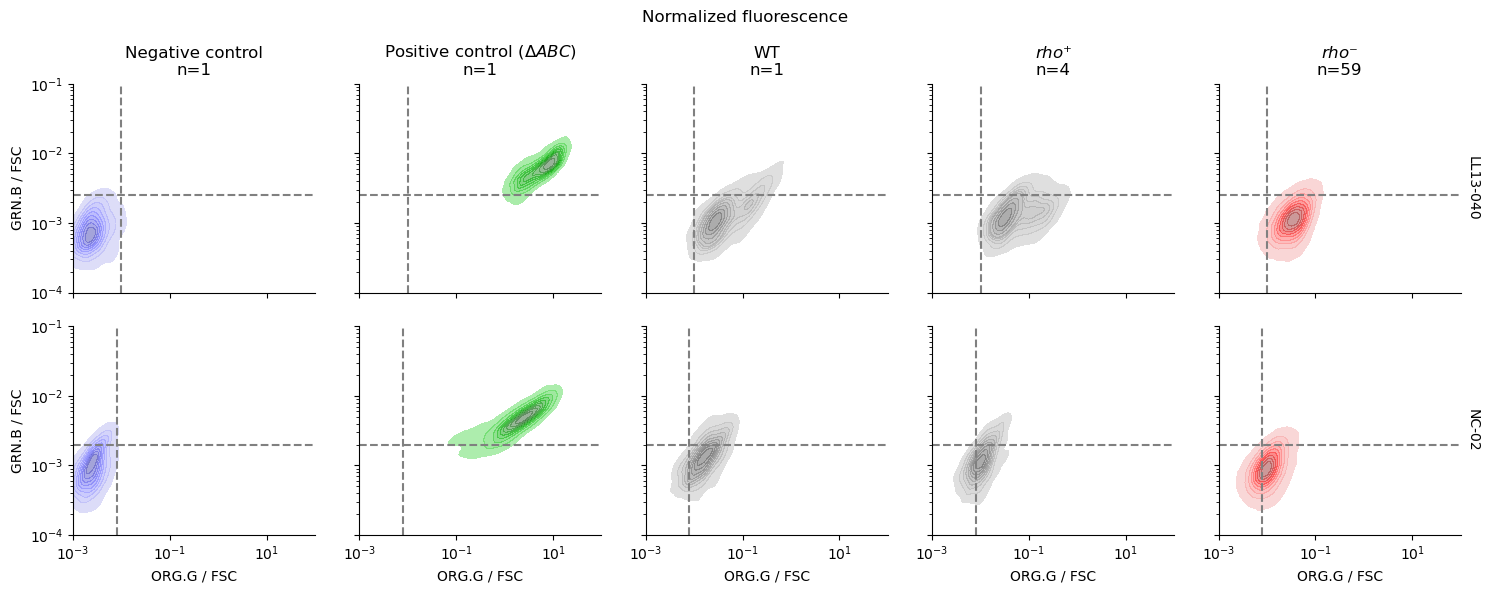

In [73]:
type_order = ['negative_control','positive_control','wt','rho_plus','rho0']
grid = sns.FacetGrid(source_df, row='strain', col='type', col_order = type_order,
                     hue = 'type', hue_order = type_order, palette=['blue', 'green', 'black', 'grey', 'red'],
                     margin_titles=True, legend_out=True)
grid.map(sns.kdeplot, 'NormOrgG', 'NormGrnB', log_scale=True, fill=True, alpha=.5)
grid.set(xlim=(0.001,100), ylim=(0.0001,0.1))
grid.set_titles(row_template='{row_name}')

type_labels = ['Negative control', u'Positive control (Δ$\it{ABC}$)', 'WT', '$\it{rho}$⁺', '$\it{rho}$⁻']
for i, v in enumerate(type_order):
    grid.axes[0][i].set_title(type_labels[i]+
                              '\nn='+str(len(source_df[source_df.type==v].well.unique()))
                             ) # Note: not the same font size as classic set_titles
    grid.axes[0][i].axhline(y=0.0025, ls='--', c='grey')
    grid.axes[0][i].axvline(x=0.01, ls='--', c='grey')
    grid.axes[1][i].axhline(y=0.002, ls='--', c='grey')
    grid.axes[1][i].axvline(x=0.008, ls='--', c='grey') 

grid.set_axis_labels('ORG.G / FSC', 'GRN.B / FSC')
grid.fig.subplots_adjust(top=0.82)
grid.fig.suptitle('Normalized fluorescence')
plt.tight_layout()
plt.savefig(graph_outpath+'20230405_Normalized_OrgG_GrnB_withGates.png', format='png', dpi=300)
plt.savefig(graph_outpath+'20230405_Normalized_OrgG_GrnB_withGates.svg', format='svg', dpi=300)

## Get percentage of fluorescent cells

In [6]:
gates_dict = {'LL13-040':(0.01, 0.0025), 'NC-02':(0.008, 0.002)}

In [7]:
def get_perc(g, channel1, channel2, gates_dict):
    strain = g.strain.values[0]
    tot = len(g)
    gated = len(g[(g[channel1] > gates_dict[strain][0]) & (g[channel2] > gates_dict[strain][1])])
    return 100*gated/tot

In [8]:
percdf = source_df.groupby(['rearray_plate_nb','strain', 'type', 'well']).apply(lambda x: get_perc(x, 'NormOrgG', 'NormGrnB', gates_dict)).reset_index(name='perc_pos')
percdf['RA_well'] = percdf.well.apply(lambda x: source_df.loc[source_df.well==x, 'RA_well'].values[0])
percdf

,rearray_plate_nb,strain,type,well,perc_pos,RA_well
0,2,LL13-040,negative_control,A02,1.05,NaN
1,2,LL13-040,positive_control,A01,97.50,NaN
2,2,LL13-040,rho0,B02,6.05,B2
3,2,LL13-040,rho0,B03,6.60,B3
4,2,LL13-040,rho0,B04,8.75,B4
...,...,...,...,...,...,...
118,3,NC-02,rho0,G08,3.95,G8
119,3,NC-02,rho0,G09,8.05,G9
120,3,NC-02,rho0,G10,7.10,G10
121,3,NC-02,rho_plus,D08,16.00,D8


In [13]:
WT_val_dic = {}
for s in percdf.strain.unique():
    WT_val_dic[s] = percdf.loc[(percdf.strain == s) & (percdf.type == 'wt'), 'perc_pos'].values[0]
WT_val_dic

{'LL13-040': 11.7, 'NC-02': 21.95}

In [14]:
def normalize_with_WT(v, s, dic):
    return v/dic[s]

In [15]:
percdf['perc_norm'] = percdf.apply(lambda row: normalize_with_WT(row.perc_pos, row.strain, WT_val_dic), axis=1)
percdf

,rearray_plate_nb,strain,type,well,perc_pos,RA_well,perc_norm
0,2,LL13-040,negative_control,A02,1.05,NaN,0.089744
1,2,LL13-040,positive_control,A01,97.50,NaN,8.333333
2,2,LL13-040,rho0,B02,6.05,B2,0.517094
3,2,LL13-040,rho0,B03,6.60,B3,0.564103
4,2,LL13-040,rho0,B04,8.75,B4,0.747863
...,...,...,...,...,...,...,...
118,3,NC-02,rho0,G08,3.95,G8,0.179954
119,3,NC-02,rho0,G09,8.05,G9,0.366743
120,3,NC-02,rho0,G10,7.10,G10,0.323462
121,3,NC-02,rho_plus,D08,16.00,D8,0.728929


In [16]:
percdf.to_excel('data/20230405_rhodamine_df.xlsx')